# Density Plots

Son gráficos 2D en los que el color o la intensidad/luminosidad del color indica el valor de los datos. En Python, los *density plots* se producen con la función $\texttt{imshow}$ de $\texttt{pylab}$.

Cuando los colores van de azul a rojo se denominan *heat maps*

In [1]:
# Importar librerías

from matplotlib.pylab import imshow, show 
import numpy as np

''' Yo suelo usar
    import matplotlib.pyplot as plt
    ax.pcolormesh(x,y,value,cmap) x,y: meshgrids
    fig.colorbar() '''

' Yo suelo usar\n    import matplotlib.pyplot as plt\n    ax.pcolormesh(x,y,value,cmap) x,y: meshgrids\n    fig.colorbar() '

In [2]:
# Asignamos un valor a z para cada punto en el plano XY

x,y = np.meshgrid(np.arange(0,501,1),np.arange(0,501,1))
z = x**2 + y**2

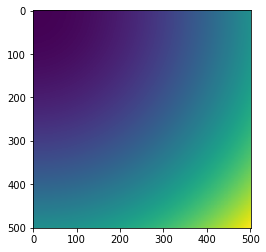

In [3]:
''' Density plot
    Cada punto en el gráfico corresponde a un valor de z
    empezando desde la esquina superior izquierda 
    z[i,j]: i (vertical, y), j (horizontal, x)''' 

imshow(z)
show()

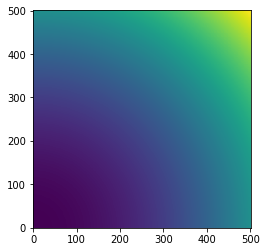

In [4]:
# Origen en la esquina inferior izquierda

imshow(z,origin="lower")
show()

## Color Schemes

- $\texttt{jet}$: default
- $\texttt{gray}$: escala de grises
- $\texttt{hot}$: negro-rojo-amarillo-blanco
- $\texttt{spectral}$: 7 colores + blanco y negro
- $\texttt{bone}$: escala de grises con sombras azules
- $\texttt{hsv}$: rainbow

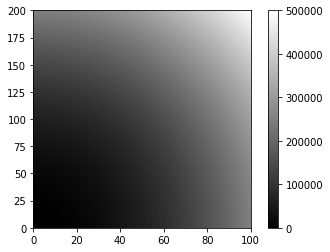

In [8]:
# Gray-scale
# colorbar(): rango de colores con sus respectivos valores
#             numéricos
# extent: ticks de los axes
# aspect = k: altura = k*ancho

from matplotlib.pylab import gray, colorbar
imshow(z,origin="lower",extent=[0,100,0,200],aspect = 0.5)
gray()
colorbar()
show()

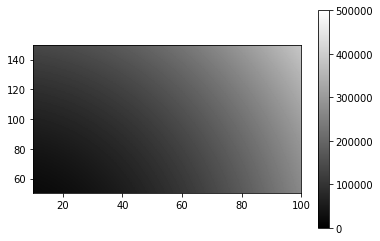

In [14]:
# Graficar solo una parte de los datos con xlim, ylim
# basado en la escala de extent

from matplotlib.pylab import xlim, ylim
imshow(z,origin="lower",extent=[0,100,0,200],aspect = 0.5)
gray()
colorbar()
xlim(10,100)
ylim(50,150)
show()

## Ejemplo: Interferencia de ondas

La onda senoidal producida por una fuente puntual en $(x_1,y_1)$ es

$$\xi_1(x,y) = \xi_0 \sin kr_1$$

donde $r_1 = \sqrt{(x-x_1)^2 + (y-y_1)^2}$

Y la producida por otra fuente puntual en $(x_2,y_2)$ es

$$\xi_2(x,y) = \xi_0 \sin kr_2$$

donde $r_2 = \sqrt{(x-x_2)^2 + (y-y_2)^2}$

Y la superposición de ambas es:

$$\xi(x,y) = \xi_0 \sin kr_1 + \xi_0 \sin kr_2$$


Suponemos

- $\lambda = 5$cm
- $\xi_0 = 1$cm
- Área del gráfico 1mx1m

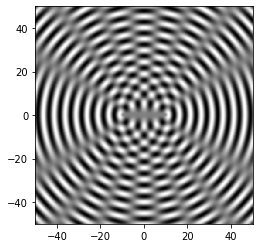

In [9]:
from math import sqrt, sin, pi
# from numpy import empty
# from pylab import imshow, gray, show

lamb = 5.0 #longitud de onda
k = 2*pi/lamb #número de onda
xi0 = 1.0 # amplitud
separation = 20.0 #distancia entre las fuentes
side = 100.0 #largo del gráfico
points = 500 #número de puntos
spacing = side/points #separación entre los puntos

# Posición de los centros (fuentes)
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Array para calcular xi (superposición)
xi = np.empty([points,points],float)

# Calcular xi
for i in range(points):
    y = spacing*i #i corresponde a y
    for j in range(points):
        x = spacing*j #j corresponde a x
        r1 = sqrt((x-x1)**2 + (y-y1)**2)
        r2 = sqrt((x-x2)**2 + (y-y2)**2)
        xi[i,j] = xi0*sin(k*r1) + xi0*sin(k*r2)

# Plot
imshow(xi,origin='lower',extent=[-side/2,side/2,-side/2,side/2])
gray()
show()

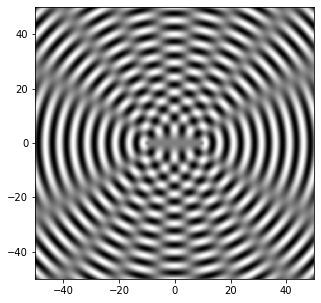

In [10]:
# Con pcolormesh

import matplotlib.pyplot as plt

lamb = 5.0 
k = 2*pi/lamb 
xi0 = 1.0
separation = 20.0
x1, y1 = -separation/2, 0
x2, y2 = separation/2, 0

# Array para calcular xi (superposición)
x, y = np.meshgrid(np.linspace(-50,50,500), np.linspace(-50,50,500))
xi = xi0*np.sin(k*np.sqrt((x-x1)**2 + (y-y1)**2)) + xi0*np.sin(k*np.sqrt((x-x2)**2 + (y-y2)**2))

fig, ax = plt.subplots(figsize=(5,5))
ax.pcolormesh(x,y,xi,cmap='gray')
plt.show()

# 3D Graphics

Sirve como herramienta para visualizar sistemas físicos. Existen muchos *packages* disponibles para este tipo de gráficos en Python pero usaremos $\texttt{vpython}$, especialmente diseñado para nuestros propósitos. 

Este paquete dibuja objetos específicos en la pantalla como esferas, cilindros, conos y más y, cuando es necesario, cambia su posición, orientación o forma.

Instalar librería

$\texttt{conda install -c vpython vpython}$

$\texttt{pip install vpython}$

In [11]:
from vpython import *

<IPython.core.display.Javascript object>

In [21]:
# Graficar esfera
scene = canvas()
sphere()

<IPython.core.display.Javascript object>

In [13]:
# Modificar tamaño y posición 
# pos debe ser un vector
scene = canvas()
sphere(radius=0.5,pos=vector(1.0,-0.2,0.0))

<IPython.core.display.Javascript object>

In [14]:
''' Modificar colores con color
    color: red, green, blue, cyan, magenta, 
           yellow, black, white'''
scene = canvas()
sphere(color=color.green)

<IPython.core.display.Javascript object>

## Atomic lattice

Simple cubic lattice. Usaremos el paquete $\texttt{vpython}$ para dibujar varias esferas en posiciones $(i,j,k)$ con $i,j,k=-L,...,L$

In [15]:
L = 5 #(número de átomos en una fila - 1)/2
R = 0.3 #radio de los átomos

scene = canvas()
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            sphere(radius=R,pos=vector(i,j,k))

<IPython.core.display.Javascript object>

Se puede rotar la vista con click derecho o presionando la tecla $\texttt{Ctrl}$. Se puede hacer zoom presionando los dos botones del mouse o la tecla $\texttt{Alt}$

In [16]:
# También se pueden modificar las propiedades de la
# esfera así

scene = canvas()
s = sphere() #nueva variable
s.radius = 0.5
s.color = color.blue

<IPython.core.display.Javascript object>

In [17]:
# Crear un arreglo de esferas

scene = canvas()
s = np.empty(10,sphere) #arreglo vacío del tipo sphere
#Llena el array con esferas de vpython
for n in range(10):
    s[n] = sphere()

<IPython.core.display.Javascript object>

También se incluyen en $\texttt{vpython}$: $\texttt{box, cone, pyramid, cylinder, arrow}$

- box
      pos=[x,y,z](centro),
      axis=[a,b,c](eje,vector paralelo al largo),
      size=[L(x),H(y),W(z)],
      up=[q,r,s](rotación,vector perpendicular a la base)
- cone y cylinder
      pos=[x,y,z](centro de la base),
      axis=[a,b,c](eje), 
      legth=L(largo),
      radius=r(radio de la base)  
- pyramid
      pos=[x,y,z](centro de la base),
      size=[L(x),H(y),W(z)],L(altura) 
- arrow
      pos=[x,y,z](end),
      axis=[a,b,c](eje,vector paralelo al largo),
      round=False(redonda o cuadrada)

Se puede modificar el canvas con

scene2 = canvas(

                title='Examples of Tetrahedrons',
                width=600, height=200, center=vector(5,0,0), background=color.cyan
                
                )
                  
y seleccionar un canvas con $\texttt{scene.select()}$ o $\texttt{canvas=scene}$ después de declarar el objeto o al declararlo, respectivamente (por defecto se ubicará en el último canvas creado)

También se puede modificar la dirección en que la "cámara" ve el objeto.

In [18]:
scene = canvas(width=200,height=200,\
        center=vector(0,0,0),forward=vector(0,0,1),\
        background=color.blue,foreground=color.yellow)
arrow()
#foreground:colores por defecto de los objetos

<IPython.core.display.Javascript object>

## Rotation
Rotate counterclockwise the object named "obj" through an angle (measured in radians) about an axis relative to an origin. By default, rotations are around the object's own pos and axis.

obj.rotate(angle=a,
           axis=vec(x,y,z),
           origin=vector(xo,yo,zo))

## Sodium chloride crystal

In [20]:
scene = canvas()

RNa = 0.227  #radio de Van der Waals de Na en pm
RCl = 0.175  #radio de Van der Waals de Cl en pm
L = 2 #(átomos por fila-1)/2
c = 0 #contador

for i in range(-L,L+1,1):
    for j in range(-L,L+1,1):
        for k in range(-L,L+1,1):
            if c%2==0:
                sphere(radius=RCl,pos=vector(i,j,k))
            else:
                sphere(radius=RNa,pos=vector(i,j,k),color=color.red)
            c+=1

<IPython.core.display.Javascript object>

AttributeError: 'canvas' object has no attribute 'save'